In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
x1 = np.random.normal(10, 5, size=100)
x2 = np.random.normal(18, 2, size=100)
x1 = np.append(x1, [1, 1.5, 20, 21, 19])
x2 = np.append(x2, [25, 3, 2.1, 7, 3])
X = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1)))


Text(0, 0.5, 'x2')

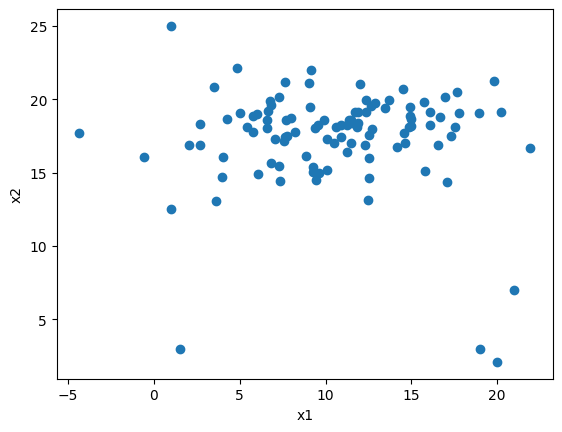

In [3]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')

(array([ 1.,  1.,  7., 11., 17., 20., 20., 15.,  8.,  5.]),
 array([-4.34294621, -1.71557297,  0.91180028,  3.53917352,  6.16654677,
         8.79392001, 11.42129326, 14.0486665 , 16.67603975, 19.303413  ,
        21.93078624]),
 <BarContainer object of 10 artists>)

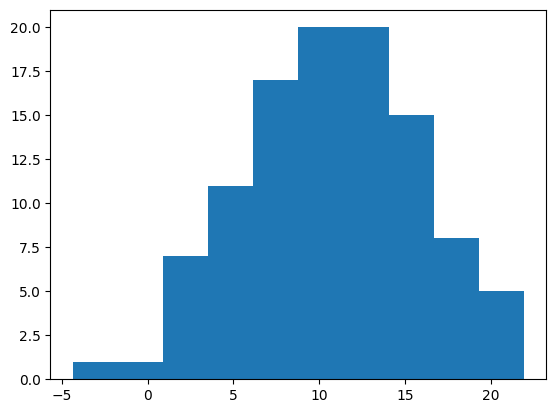

In [4]:
plt.hist(x1)

(array([ 3.,  0.,  1.,  0.,  3., 13., 34., 41.,  9.,  1.]),
 array([ 2.1 ,  4.39,  6.68,  8.97, 11.26, 13.55, 15.84, 18.13, 20.42,
        22.71, 25.  ]),
 <BarContainer object of 10 artists>)

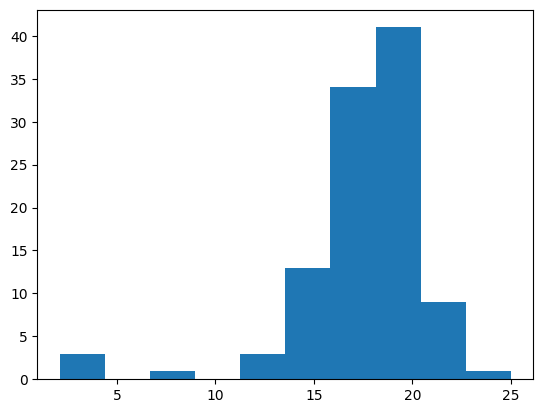

In [5]:
plt.hist(x2)

{'whiskers': [<matplotlib.lines.Line2D at 0x28b386e50d0>,
 'caps': [<matplotlib.lines.Line2D at 0x28b3aae60c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b3aae59d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28b3aae6690>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b3aae68d0>],
 'means': []}

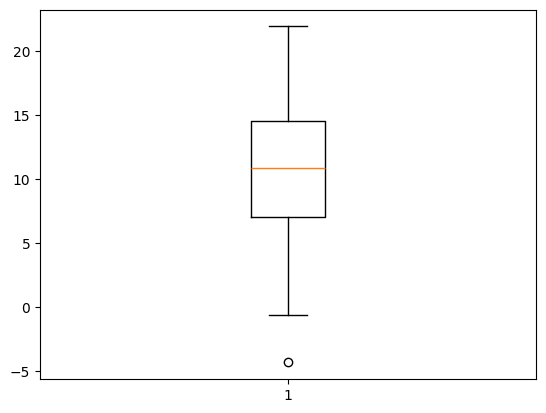

In [6]:
plt.boxplot(x1)

{'whiskers': [<matplotlib.lines.Line2D at 0x28b3ab2ff20>,
 'caps': [<matplotlib.lines.Line2D at 0x28b3ab5c380>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b3ab2fda0>],
 'medians': [<matplotlib.lines.Line2D at 0x28b3ab5c8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b3ab5cb30>],
 'means': []}

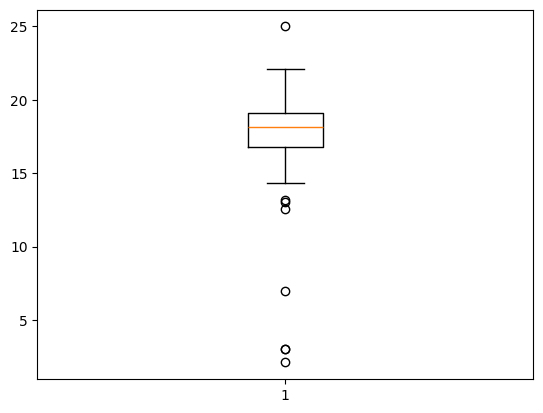

In [7]:
plt.boxplot(x2)

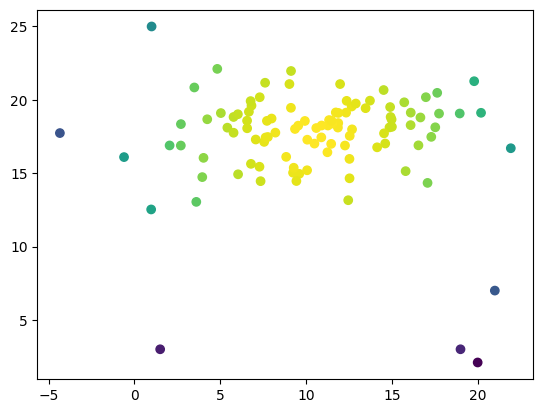

In [9]:
def gaussian_2d(x1, x2):
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    s1 = np.var(x1)
    s2 = np.var(x2)

    norm = 2 * np.pi * s1 * s2
    sq1 = (x1 - m1) ** 2
    sq2 = (x2 - m2) ** 2

    return np.exp(-(sq1 + sq2) / (2 * s1 * s2)) / norm

proba_x1x2 = gaussian_2d(x1, x2)

plt.scatter(x1, x2, c=proba_x1x2)

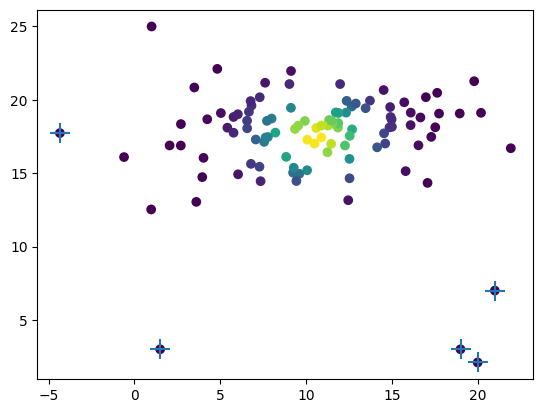

In [10]:
from scipy import stats

means = np.mean([x1, x2], axis=1)
stdevs = np.std([x1, x2], axis=1)

dist = stats.multivariate_normal(means, stdevs)
proba = dist.pdf(np.array([x1, x2]).T)
plt.scatter(x1, x2, c=proba)

minimums = np.argsort(proba)[:5]
plt.scatter(x1[minimums], x2[minimums], marker='+', s=200)

In [11]:
proba

array([1.56489812e-02, 6.36638374e-05, 6.66088946e-03, 1.57541853e-02,
       2.25146596e-04, 7.63437471e-03, 1.40946979e-02, 3.70527086e-02,
       1.19167927e-03, 1.65763871e-04, 1.82028256e-03, 3.41099432e-02,
       7.47232484e-03, 3.08737719e-03, 4.91566130e-03, 1.37695585e-02,
       4.50747044e-03, 7.43610985e-03, 3.02046960e-02, 3.15280347e-02,
       1.15130853e-07, 2.01872766e-05, 2.34294408e-02, 5.81562827e-03,
       1.30542791e-03, 1.06767245e-06, 1.29298397e-02, 3.76388084e-02,
       1.44467556e-02, 5.11402066e-03, 4.52643261e-03, 2.14878481e-03,
       1.55259816e-03, 4.38115636e-03, 2.92060385e-02, 1.84266011e-02,
       1.72101383e-03, 4.50459281e-04, 1.71708010e-02, 2.73035850e-02,
       1.21544158e-03, 2.89878297e-06, 2.63803723e-05, 5.36392753e-05,
       7.32611400e-05, 2.79060914e-02, 3.04023480e-02, 1.78275471e-03,
       6.24781104e-04, 5.92780210e-03, 4.50192397e-03, 5.70367928e-03,
       1.54422950e-07, 3.22501777e-03, 5.58325242e-03, 4.47150465e-04,
      

In [12]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import LocalOutlierFactor

kmeans = KMeans(n_clusters=1, n_init='auto').fit(X)

In [13]:
kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]

(10.554038402492205, 17.441321372792913)

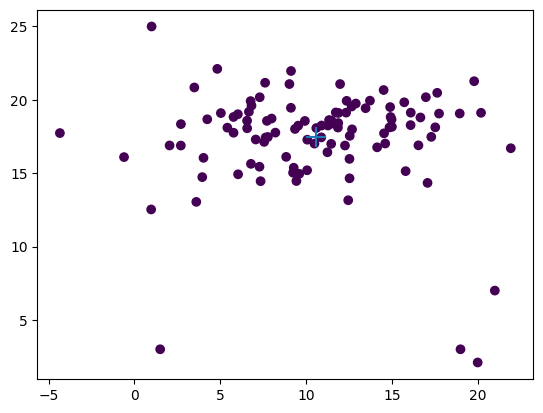

In [14]:
fig, axes = plt.subplots()

plt.scatter(x1, x2, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], marker='+', s=200)


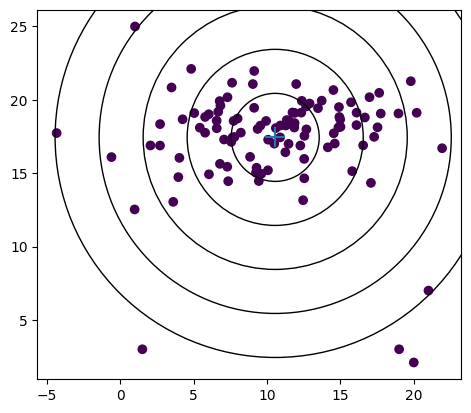

In [15]:
fig, axes = plt.subplots()

plt.scatter(x1, x2, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], marker='+', s=200)

for i in range(6):
    circle = plt.Circle((kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]), i * 3, fill=False)
    axes.set_aspect(1)
    axes.add_artist(circle)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1  1 -1  1]


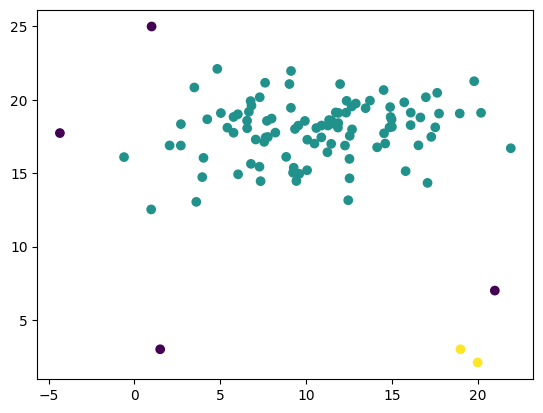

In [16]:
db = DBSCAN(eps=4, min_samples=2).fit(X)
print(db.labels_)

plt.scatter(x1, x2, c=db.labels_)

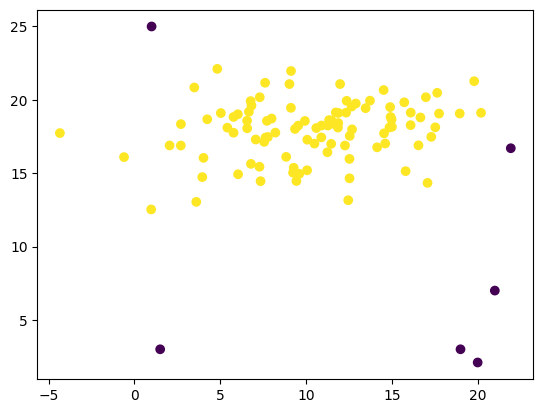

In [17]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
y_pred = lof.fit_predict(X)

plt.scatter(x1, x2, c=y_pred)

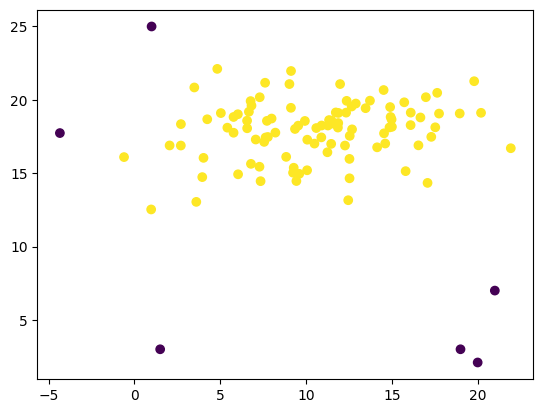

In [18]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.05).fit(X)

plt.scatter(x1, x2, c=isf.predict(X))